In [1]:
import os
import sys
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets, splits
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split

In [3]:
root = '../../datasets/raptor_individuals_new'

In [25]:
from data.raptors_wildlife import Raptors, RaptorsWildlife

ds = Raptors(root)

In [26]:
raptors = RaptorsWildlife(root=root)
ds = raptors.wildlife_dataset()

In [27]:
df = ds.df
df

,image_id,species,identity_id,identity,path,from_video,video,date
0,0,whteag,0,England_G818,../../datasets/raptor_individuals_new/whteag/E...,False,None,2024
1,1,whteag,0,England_G818,../../datasets/raptor_individuals_new/whteag/E...,False,None,2024
2,2,whteag,0,England_G818,../../datasets/raptor_individuals_new/whteag/E...,False,None,2024
3,3,whteag,1,England_G471,../../datasets/raptor_individuals_new/whteag/E...,False,None,2021
4,4,whteag,1,England_G471,../../datasets/raptor_individuals_new/whteag/E...,False,None,2022
...,...,...,...,...,...,...,...,...
2503,2503,goleag,71,SouthScotland_tallaF15,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000
2504,2504,goleag,71,SouthScotland_tallaF15,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000
2505,2505,goleag,72,SouthScotland_sulaB50,../../datasets/raptor_individuals_new/goleag/S...,False,None,2022
2506,2506,goleag,72,SouthScotland_sulaB50,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000


In [29]:
# closed-set split, where each individual has samples in both the training and testing sets.
splitter = splits.ClosedSetSplit(0.8)
for idx_train, idx_test in splitter.split(df):
    splits.analyze_split(df, idx_train, idx_test)


Split: time-unaware closed-set
Samples: train/test/unassigned/total = 1996/512/0/2508
Classes: train/test/unassigned/total = 72/69/0/72
Samples: train only/test only        = 3/0
Classes: train only/test only/joint  = 3/0/69

Fraction of train set     = 79.59%
Fraction of test set only = 0.00%


In [30]:
df_train, df_test = df.loc[idx_train], df.loc[idx_test]

In [31]:
df_train

,image_id,species,identity_id,identity,path,from_video,video,date
1023,1023,goleag,35,Alabama_natchez,../../datasets/raptor_individuals_new/goleag/A...,False,None,2000
1036,1036,goleag,38,Bernheim_athena,../../datasets/raptor_individuals_new/goleag/B...,False,None,2022
1034,1034,goleag,38,Bernheim_athena,../../datasets/raptor_individuals_new/goleag/B...,False,None,2000
1033,1033,goleag,38,Bernheim_athena,../../datasets/raptor_individuals_new/goleag/B...,False,None,2000
1035,1035,goleag,38,Bernheim_athena,../../datasets/raptor_individuals_new/goleag/B...,False,None,2023
...,...,...,...,...,...,...,...,...
2337,2337,goleag,67,SouthScotland_thistleH03,../../datasets/raptor_individuals_new/goleag/S...,True,abernethy-male-h03-chasing-wood-pigeon-august-...,2000
2334,2334,goleag,67,SouthScotland_thistleH03,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000
2336,2336,goleag,67,SouthScotland_thistleH03,../../datasets/raptor_individuals_new/goleag/S...,True,abernethy-male-h03-chasing-wood-pigeon-august-...,2000
632,632,osprey,18,blue_DF,../../datasets/raptor_individuals_new/osprey/b...,False,None,2017


In [9]:
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split

Number of identitites            72
Number of all animals            2508
Number of animals with one image 3
Number of unidentified animals   0
Number of videos                 133
Images span                      0 days


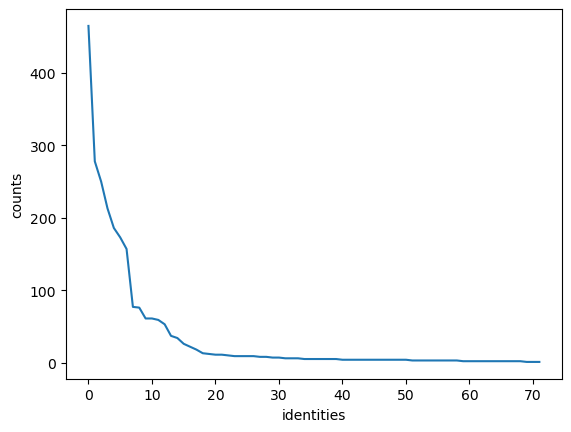

In [10]:
display_statistics(df)

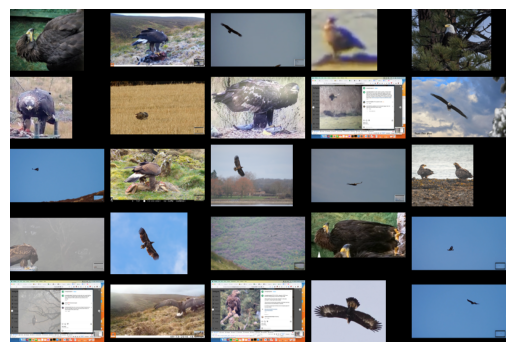

In [11]:
ds.plot_grid(n_cols=5);

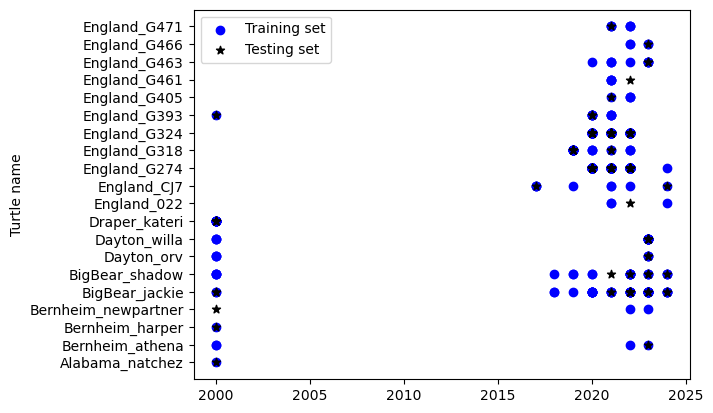

In [12]:
visualize_split(df_train, df_test, selection=20)

In [13]:
from wildlife_tools.data.dataset import WildlifeDataset
import torchvision.transforms as T

transform = T.Compose([T.Resize([224, 224]), T.ToTensor(), T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])
dataset = RaptorsWildlife(df, root, transform=transform)

In [14]:
dataset_database = WildlifeDataset(df.iloc[100:,:], ds.root, transform=transform)
dataset_query = WildlifeDataset(df.iloc[:100,:], ds.root, transform=transform)

In [15]:
import timm
from wildlife_tools.features.deep import DeepFeatures

name = 'hf-hub:BVRA/MegaDescriptor-T-224'
extractor = DeepFeatures(timm.create_model(name, num_classes=0, pretrained=True))
query, database = extractor(dataset_query), extractor(dataset_database)

 21%|█████████████▍                                                  | 4/19 [00:59<03:43, 14.88s/it]


KeyboardInterrupt: 

In [ ]:
from wildlife_tools.similarity.cosine import CosineSimilarity

similarity_function = CosineSimilarity()
similarity = similarity_function(query, database)

In [ ]:
print(similarity['default'].shape)

(100, 2408)


In [20]:
from collections import defaultdict
import numpy as np
import torch
import pandas as pd


class KnnClassifier:
    """
    Predict query label as k labels of nearest matches in database. If there is tie at given k,
    prediction from k-1 is used. Input is similarity matrix with `n_query` x `n_database` shape.


    Args:
        k: use k nearest in database for the majority voting.
        database_labels: list of labels in database. If provided, decode predictions to database
        (e.g. string) labels.
    Returns:
        1D array with length `n_query` of database labels (col index of the similarity matrix).
    """

    def __init__(self, k: int = 1, database_labels: np.array = None):
        self.k = k
        self.database_labels = database_labels

    def __call__(self, similarity):
        similarity = torch.tensor(similarity, dtype=float)
        scores, idx = similarity.topk(k=self.k, dim=1)
        pred = self.aggregate(idx)[:, self.k - 1]

        if self.database_labels is not None:
            print(len(pred))
            print(len(self.database_labels))
            pred = self.database_labels[pred]
        return pred

    def aggregate(self, predictions):
        """
        Aggregates array of nearest neighbours to single prediction for each k.
        If there is tie at given k, prediction from k-1 is used.

        Args:
            array of with shape [n_query, k] of nearest neighbours.
        Returns:
            array with predictions [n_query, k]. Column dimensions are predictions for [k=1,...,k=k]
        """

        results = defaultdict(list)
        for k in range(1, predictions.shape[1] + 1):
            for row in predictions[:, :k]:
                vals, counts = np.unique(row, return_counts=True)
                best = vals[np.argmax(counts)]

                counts_sorted = sorted(counts)
                if (len(counts_sorted)) > 1 and (counts_sorted[0] == counts_sorted[1]):
                    best = None
                results[k].append(best)

        results = pd.DataFrame(results).T.fillna(method="ffill").T
        return results.values
    
class KnnMatcher:
    """
    Find nearest match to query in existing database of features.
    Combines CosineSimilarity and KnnClassifier.
    """

    def __init__(self, database, k=1):
        self.similarity = CosineSimilarity()
        self.database = database
        self.classifier = KnnClassifier(
            database_labels=self.database.labels_string, k=k
        )

    def __call__(self, query):
        if isinstance(query, list):
            query = np.concatenate(query)

        if not isinstance(query, np.ndarray):
            raise ValueError("Query should be array or list of features.")

        sim_matrix = self.similarity(query, self.database.features)["cosine"]
        return self.classifier(sim_matrix)



In [ ]:
import numpy as np

classifier = KnnClassifier(k=1, database_labels=dataset_database.labels_string)
predictions = classifier(similarity['default'])
accuracy = np.mean(dataset_query.labels_string == predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 10.00%


/var/folders/gx/lbyd01qj4yg41hbq5y7z8j380000gn/T/ipykernel_54382/2343340979.py:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


## Training with TripletLoss

In [138]:
def split_query_database(test_metadata):
    """
    Splits the test metadata into query and database sets ensuring each identity
    is present in both query and database datasets, without data leakage (i.e.,
    the same image cannot be in both query and database).

    Args:
        test_metadata (pd.DataFrame): Dataframe containing test image metadata.
        batch_size (int): Batch size to determine the split.

    Returns:
        query_metadata (pd.DataFrame): Metadata for the query set.
        database_metadata (pd.DataFrame): Metadata for the database set.
    """
    identities = test_metadata['identity'].unique()
    query_indices = []
    database_indices = []

    for identity in identities:
        identity_indices = test_metadata[test_metadata['identity'] == identity].index.tolist()
        if len(identity_indices) > 1:
            query_indices.append(identity_indices[0])
            database_indices.extend(identity_indices[1:])
        else:
            # Skip identities with less than 2 images to avoid data leakage
            continue

    query_metadata = test_metadata.loc[query_indices].reset_index(drop=True)
    database_metadata = test_metadata.loc[database_indices].reset_index(drop=True)

    return query_metadata, database_metadata

In [10]:
import sys
sys.path.append('..')
from wildlife_datasets import datasets, splits

from torch.utils.data import DataLoader
from torchvision import transforms
from data.raptors_wildlife import Raptors, RaptorsWildlife

batch_size = 8

root = '../../datasets/raptor_individuals_new'
dataset = Raptors(root)
df = dataset.df

# closed-set split, where each individual has samples in both the training and testing sets.
splitter = splits.ClosedSetSplit(0.8)
for idx_train, idx_test in splitter.split(df):
    splits.analyze_split(df, idx_train, idx_test)

df_train, df_test = df.loc[idx_train], df.loc[idx_test]
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

df_query, df_database = split_query_database(df_test)

dataset_train = RaptorsWildlife(df_train, root, transform=transform)
dataset_database = RaptorsWildlife(df_database, root, transform=transform)
dataset_database.metadata.reset_index(drop=True, inplace=True)
dataset_query = RaptorsWildlife(df_query, root, transform=transform)


# Create dataloaders
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
query_loader = DataLoader(dataset_query, batch_size=batch_size, shuffle=False)
database_loader = DataLoader(dataset_database, batch_size=batch_size, shuffle=False)

Split: time-unaware closed-set
Samples: train/test/unassigned/total = 1997/512/0/2509
Classes: train/test/unassigned/total = 72/69/0/72
Samples: train only/test only        = 3/0
Classes: train only/test only/joint  = 3/0/69

Fraction of train set     = 79.59%
Fraction of test set only = 0.00%


NameError: name 'split_query_database' is not defined

In [151]:
print(f"total: {len(df)}, train:{len(df_train)}, test: {len(df_test)}")

print(f"dataset train:{len(dataset_train)} \nquery:{len(dataset_query)}, database{len(dataset_database)}")

print(len(train_loader), len(query_loader), len(database_loader))

total: 2509, train:1997, test: 512
dataset train:1997 
query:29, database443
250 4 56


In [11]:
df_test

,image_id,species,identity_id,identity,path,from_video,video,date
0,1025,goleag,35,Alabama_natchez,../../datasets/raptor_individuals_new/goleag/A...,False,None,2000
1,1035,goleag,38,Bernheim_athena,../../datasets/raptor_individuals_new/goleag/B...,False,None,2000
2,2501,goleag,70,Bernheim_harper,../../datasets/raptor_individuals_new/goleag/B...,False,None,2000
3,1032,goleag,37,Bernheim_newpartner,../../datasets/raptor_individuals_new/goleag/B...,False,None,2000
4,688,baleag,22,BigBear_jackie,../../datasets/raptor_individuals_new/baleag/B...,False,None,2000
...,...,...,...,...,...,...,...,...
507,2504,goleag,71,SouthScotland_tallaF15,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000
508,1048,goleag,40,SouthScotland_tarrasA31,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000
509,1052,goleag,40,SouthScotland_tarrasA31,../../datasets/raptor_individuals_new/goleag/S...,True,bJXiKJt8K90,2000
510,2338,goleag,67,SouthScotland_thistleH03,../../datasets/raptor_individuals_new/goleag/S...,True,abernethy-male-h03-chasing-wood-pigeon-august-...,2000


In [104]:
import torch
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_metric_learning import losses, miners
from torch import nn
import timm


class TripletLightningModel(pl.LightningModule):
    def __init__(self, backbone_model_name, embedding_size=128, margin=0.2, mining_type="semihard", lr=0.001):
        super().__init__()
        # Backbone (ResNet without the final FC layer)
        self.backbone = timm.create_model(model_name=backbone_model_name, pretrained=True, num_classes=0)
        # Embedder (to project features into the desired embedding space)
        self.embedder = nn.Linear(self.backbone.feature_info[-1]["num_chs"], embedding_size)
        # self.fc = nn.Linear(self.model.output_size, embedding_size)  # Embedding layer
        self.loss_fn = losses.TripletMarginLoss(margin=margin)
        self.miner = miners.TripletMarginMiner(margin=margin, type_of_triplets=mining_type)
        self.lr = lr

    def forward(self, x):
        features = self.backbone(x)  # Extract features using the backbone
        embeddings = self.embedder(features)  # Project features into the embedding space
        return embeddings  # Project features to embedding space

    def training_step(self, batch, batch_idx):
        images, labels = batch
        embeddings = self(images)
        mined_triplets = self.miner(embeddings, labels)
        loss = self.loss_fn(embeddings, labels, mined_triplets)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

In [105]:
from pytorch_lightning import Trainer

# Create the LightningModule with Triplet Loss
model = TripletLightningModel(backbone_model_name='resnet50', margin=0.2, mining_type='hard')

# Train the model
trainer_args = {
        'max_epochs': 1,
        # 'callbacks': callbacks,
        'default_root_dir': 'logs',
        'accelerator': 'cpu',
        'devices': 1,
        # 'logger': wandb_logger,
        'deterministic': True,
    }
trainer = Trainer(**trainer_args)
trainer.fit(model, train_loader)


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | backbone | ResNet             | 23.5 M | train
1 | embedder | Linear             | 262 K  | train
2 | loss_fn  | TripletMarginLoss  | 0      | train
3 | miner    | TripletMarginMiner | 0      | train
--------------------------------------------------------
23.8 M    Trainable params
0         Non-trainable params
23.8 M    Total params
95.081    Total estimated model params size (MB)
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


In [106]:
def get_all_embeddings(extractor, dataloader):
    all_embeddings = []
    # all_labels = []
    for batch in dataloader:
        inputs, labels = batch
        embeddings = extractor.get_embeddings(inputs)
        all_embeddings.append(embeddings)
        # all_labels.append(labels)
    all_embeddings = torch.cat(all_embeddings)
    # all_labels = torch.cat(all_labels)
    return all_embeddings #, all_labels

In [140]:
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
from pytorch_metric_learning.utils.inference import InferenceModel
from pytorch_metric_learning.distances import CosineSimilarity
import numpy as np

# Initialize the feature extractor
extractor = InferenceModel(trunk=model.backbone, embedder=model.embedder)
# Extract features from query and database
# query_embeddings = extractor.get_embeddings(query_loader)
# database_embeddings = extractor.get_embeddings(database_loader)
query_embeddings = get_all_embeddings(extractor, query_loader)
database_embeddings = get_all_embeddings(extractor, database_loader)

In [155]:
from wildlife_tools.similarity.cosine import CosineSimilarity

# Cosine similarity between deep features
similarity_function = CosineSimilarity()
similarity = similarity_function(query_embeddings, database_embeddings)['default']
print("Similarity matrix: \n", similarity.shape)

### Debug: Check indices and sizes
print(f"Database labels size: {len(dataset_database.labels_map)}")
print(f"Sample indices from similarity: {np.argmax(similarity, axis=1)[:10]}")

Similarity matrix: 
 (29, 443)
Database labels size: 29
Sample indices from similarity: [390   6 342  14 182   4  43  80  86 152]


In [161]:
# Nearest neigbour classifier using the similarity
classifier = KnnClassifier(k=1, database_labels=dataset_database.labels)
preds = classifier(similarity)
preds = dataset_database.labels_map[preds]
print("Predictions \t", preds)
print("Ground truths \t", dataset_query.labels_string)

accuracy = sum(preds == dataset_query.labels_string) / len(dataset_query.labels_string)
# accuracy = np.mean(dataset_query.labels == predictions)

print(f"Accuracy: {accuracy * 100:.4f}%")


29
443
Predictions 	 ['SouthScotland_shineB44' 'BigBear_jackie' 'SouthScotland_emily121'
 'BigBear_shadow' 'Orrhult_269K' 'BigBear_jackie' 'England_G274'
 'England_G318' 'England_G324' 'NewJersey_duke' 'SouthScotland_skanC17'
 'England_G801' 'SouthScotland_beakyC11' 'NewJersey_duke' 'BigBear_jackie'
 'Draper_kateri' 'Orrhult_269K' 'Orrhult_269K' 'SouthScotland_beakyC11'
 'SouthScotland_edwardC09' 'SouthScotland_ellenaB46' 'England_G324'
 'SouthScotland_emmaF02' 'SouthScotland_heatherF05'
 'SouthScotland_beakyC11' 'SouthScotland_beakyC11'
 'SouthScotland_shineB44' 'SouthScotland_skanC17' 'England_CJ7']
Ground truths 	 ['BigBear_jackie' 'BigBear_shadow' 'Dayton_orv' 'Dayton_willa'
 'Draper_kateri' 'England_CJ7' 'England_G274' 'England_G318'
 'England_G324' 'England_G393' 'England_G463' 'England_G801'
 'England_G812' 'NewJersey_duke' 'Orrhult_269K' 'Orrhult_279G'
 'Orrhult_506H' 'Orrhult_511L' 'SouthScotland_beakyC11'
 'SouthScotland_edwardC09' 'SouthScotland_ellenaB46'
 'SouthScotland_em

/var/folders/gx/lbyd01qj4yg41hbq5y7z8j380000gn/T/ipykernel_20106/1066389170.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


In [167]:
print(len(preds))
print(len(dataset_query.labels_string))

for i in range(len(preds)):
    if preds[i] == dataset_query.labels_string[i]:
        print("match")
    else:
        print("No match")

29
29
No match
No match
No match
No match
No match
No match
match
match
match
No match
No match
match
No match
match
No match
No match
No match
No match
match
match
match
No match
match
match
No match
No match
match
match
No match


In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

# Function to load an image from a given path
def load_image(path):
    img_path = path
    # img_path = os.path.join(DATA, path)
    img = Image.open(img_path)
    return img

def display_results(query_metadata, db_metadata, query_start, predictions, num_images=10):
    fig, axes = plt.subplots(num_images, 3, figsize=(10, 3 * num_images))
    fig.tight_layout(pad=0.5)
    
    for i in range(num_images):
        idx = query_start + i
        
        # Query image
        query_img_path = query_metadata.iloc[idx]['path']
        # print("query img path:", query_img_path)
        query_img = load_image(query_img_path)
        
        # Predicted image
        predicted_label = predictions[i]
        # print("predicted label:", predicted_label)
        filtered_id_pred = db_metadata[db_metadata['identity'] == predicted_label]
        # print("filtered id pred:", filtered_id_pred)

        predicted_img_path = filtered_id_pred['path'].values[0]
        # print("predicted img path:", predicted_img_path)
        predicted_img_species = filtered_id_pred['species'].values[0]
        # print("predicted img species:", predicted_img_species)
        predicted_img = load_image(predicted_img_path)
        
        # Ground truth image
        ground_truth_label = query_metadata.iloc[idx]['identity'] # identity of the query image
        # print ("ground truth label:", ground_truth_label)
        filtered_id_truth = db_metadata[db_metadata['identity'] == ground_truth_label] # get that from db
        # print("filtered id truth:", filtered_id_truth)
        print

        ground_truth_img_path = filtered_id_truth['path'].values[0] #ERROR
        truth_img_species = filtered_id_truth['species'].values[0]
        ground_truth_img = load_image(ground_truth_img_path)
        
        # Display query image
        axes[i, 0].imshow(query_img)
        axes[i, 0].set_title(f'Query Image: {query_metadata.iloc[idx]['identity']}')
        axes[i, 0].axis('off')
        
        # Display predicted image
        axes[i, 1].imshow(predicted_img)
        axes[i, 1].set_title(f'Predicted: {predicted_img_species}, {predicted_label}')
        axes[i, 1].axis('off')
        
        # Display ground truth image
        axes[i, 2].imshow(ground_truth_img)
        axes[i, 2].set_title(f'Ground Truth: {truth_img_species}, {ground_truth_label}')
        axes[i, 2].axis('off')

    plt.show()

In [169]:
print(dataset_query.metadata)

    image_id species  identity_id                   identity  \
0        688  baleag           22             BigBear_jackie   
1        966  baleag           26             BigBear_shadow   
2        957  baleag           25                 Dayton_orv   
3       1004  baleag           27               Dayton_willa   
4       1308  goleag           53              Draper_kateri   
5        618  osprey           15                England_CJ7   
6         93  whteag            3               England_G274   
7        520  whteag            9               England_G318   
8        375  whteag            4               England_G324   
9        495  whteag            8               England_G393   
10       472  whteag            5               England_G463   
11       543  whteag           11               England_G801   
12       486  whteag            7               England_G812   
13       877  baleag           23             NewJersey_duke   
14      1045  goleag           39       

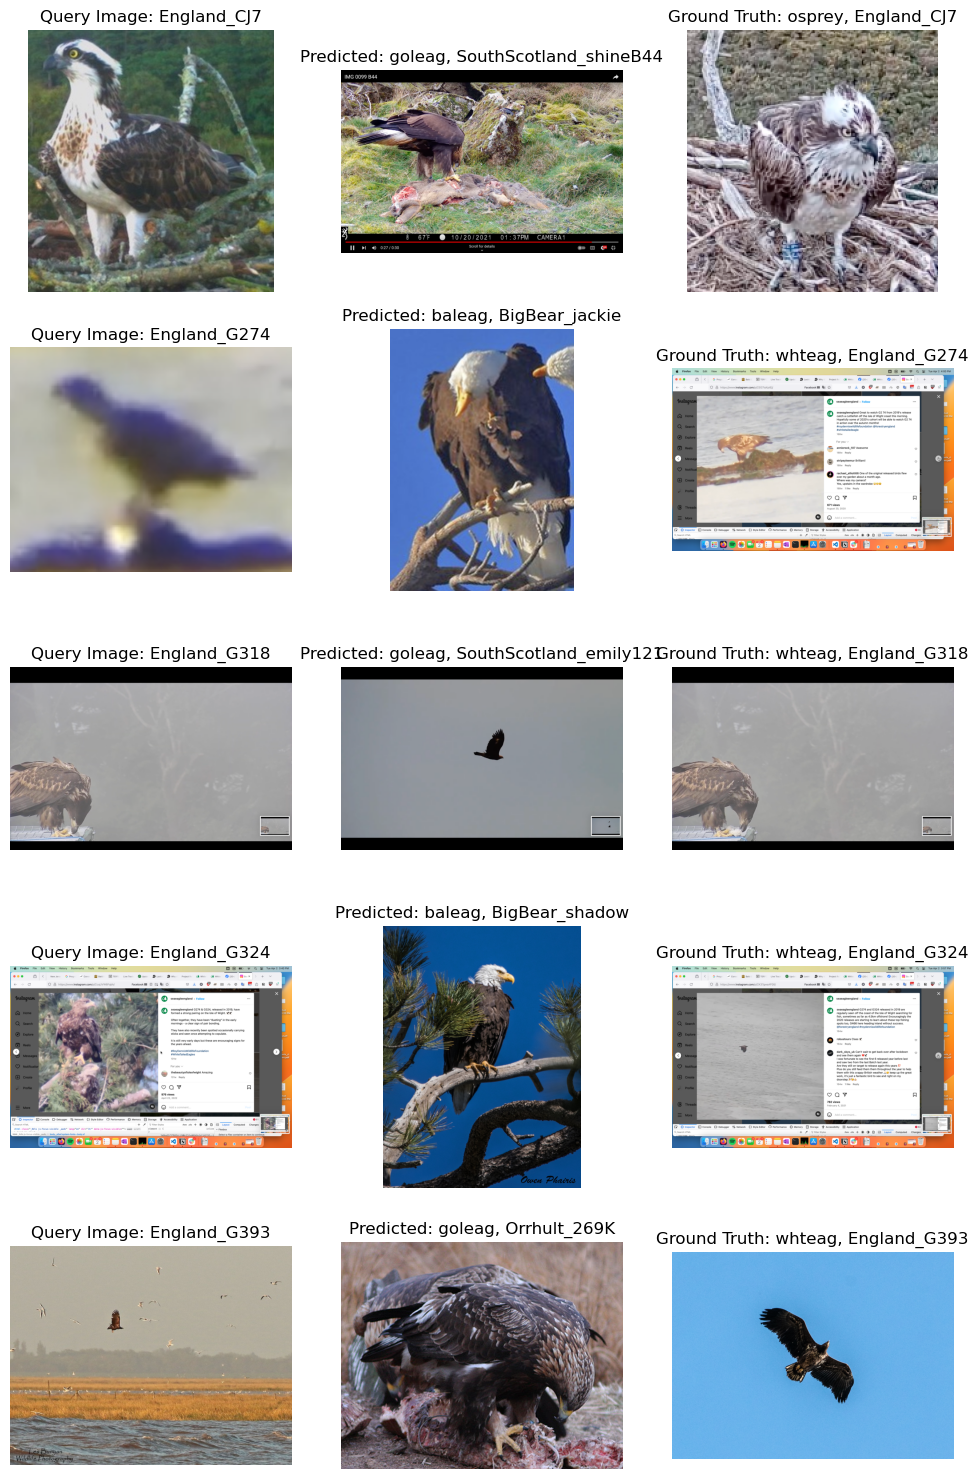

In [170]:
display_results(dataset_query.metadata,dataset_database.metadata, 5, preds, num_images=5)

## Using module classes

In [2]:
from models.triplet_loss_model import TripletModel
from data.raptors_wildlife import Raptors, RaptorsWildlife, WildlifeReidDataModule, GoldensWildlife


root = '../../datasets/raptor_individuals_new'


dataset = Raptors(root)
df = dataset.df
data = WildlifeReidDataModule(root, df)



Split: time-unaware closed-set
Samples: train/test/unassigned/total = 1997/512/0/2509
Classes: train/test/unassigned/total = 72/69/0/72
Samples: train only/test only        = 3/0
Classes: train only/test only/joint  = 3/0/69

Fraction of train set     = 79.59%
Fraction of test set only = 0.00%


In [3]:
from pytorch_lightning import Trainer
# Create the LightningModule with Triplet Loss
model = TripletModel(backbone_model_name='resnet50', margin=0.2, mining_type='hard')

# Train the model
trainer_args = {
        'max_epochs': 1,
        # 'callbacks': callbacks,
        'default_root_dir': 'logs',
        'accelerator': 'cpu',
        'devices': 1,
        # 'logger': wandb_logger,
        'deterministic': True,
    }
trainer = Trainer(**trainer_args)
trainer.fit(model, data)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | backbone | ResNet          

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/wildlife_tools/similarity/cosine.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a, b = torch.tensor(a), torch.tensor(b)
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


### Inference

In [6]:
from utils.triplet_loss_utils import get_all_embeddings
from pytorch_metric_learning.utils.inference import InferenceModel
from wildlife_tools.similarity.cosine import CosineSimilarity

query_loader, gallery_loader = data.val_dataloader()

# Initialize the feature extractor
extractor = InferenceModel(trunk=model.backbone, embedder=model.embedder)
# Extract features from query and database
query_embeddings = get_all_embeddings(extractor, query_loader)
gallery_embeddings = get_all_embeddings(extractor, gallery_loader)

similarity_function = CosineSimilarity()
similarity = similarity_function(query_embeddings, gallery_embeddings)['default']
print("Similarity matrix: \n", similarity.shape)

Similarity matrix: 
 (29, 443)


In [8]:
from utils.triplet_loss_utils import KnnClassifier

# Nearest neigbour classifier using the similarity
classifier = KnnClassifier(k=1, database_labels=dataset_database.labels)
preds = classifier(similarity)
preds = dataset_database.labels_map[preds]
print("Predictions \t", preds)
print("Ground truths \t", dataset_query.labels_string)

accuracy = np.mean(dataset_query.labels == predictions)

print(f"Accuracy: {accuracy * 100:.4f}%")

ImportError: cannot import name 'KnnClassifier' from 'utils.triplet_loss_utils' (/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py)

In [ ]:
from utils.visualization import display_results

display_results(dataset_query.metadata,dataset_database.metadata, 5, preds, num_images=5)